In [177]:
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
from operator import attrgetter
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [88]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [89]:
df=pd.read_csv('Old_df.csv')
df.drop(columns=['Unnamed: 0'],inplace=True)
df

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,GST,Invoice_Value,Gender,Location,Tenure_Months,New_Transaction_Date,Trans_Month,Trans_Year,Trans_Week,Trans_Day
0,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,0.10,15223.790,M,Chicago,12,2019-01-01,January,2019,1,1
1,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,0.10,13532.980,M,Chicago,12,2019-01-01,January,2019,1,1
2,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,0.10,11842.170,M,Chicago,12,2019-01-01,January,2019,1,1
3,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,0.10,15223.790,M,Chicago,12,2019-01-01,January,2019,1,1
4,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,0.10,13532.980,M,Chicago,12,2019-01-01,January,2019,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630283,16333,47144,20191216,GGOENEBQ093499,Nest Detect - USA,Nest,5,49.95,6.5,Not Used,...,0.05,20985.500,F,New York,41,2019-12-16,December,2019,51,350
630284,16333,47144,20191216,GGOENEBQ093499,Nest Detect - USA,Nest,5,49.95,6.5,Not Used,...,0.05,18363.125,F,New York,41,2019-12-16,December,2019,51,350
630285,16333,47144,20191216,GGOENEBQ093499,Nest Detect - USA,Nest,5,49.95,6.5,Not Used,...,0.05,23607.875,F,New York,41,2019-12-16,December,2019,51,350
630286,16333,47144,20191216,GGOENEBQ093499,Nest Detect - USA,Nest,5,49.95,6.5,Not Used,...,0.05,20985.500,F,New York,41,2019-12-16,December,2019,51,350


In [90]:
df.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Month', 'Coupon_Code',
       'Discount_pct', 'GST', 'Invoice_Value', 'Gender', 'Location',
       'Tenure_Months', 'New_Transaction_Date', 'Trans_Month', 'Trans_Year',
       'Trans_Week', 'Trans_Day'],
      dtype='object')

In [91]:
df.drop(columns=['Transaction_Date','Trans_Week', 'Trans_Day'],inplace=True)

In [92]:
df

,CustomerID,Transaction_ID,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Coupon_Code,Discount_pct,GST,Invoice_Value,Gender,Location,Tenure_Months,New_Transaction_Date,Trans_Month,Trans_Year
0,17850,16679,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10,0.10,15223.790,M,Chicago,12,2019-01-01,January,2019
1,17850,16679,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Feb,ELEC20,20,0.10,13532.980,M,Chicago,12,2019-01-01,January,2019
2,17850,16679,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Mar,ELEC30,30,0.10,11842.170,M,Chicago,12,2019-01-01,January,2019
3,17850,16679,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Apr,ELEC10,10,0.10,15223.790,M,Chicago,12,2019-01-01,January,2019
4,17850,16679,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,May,ELEC20,20,0.10,13532.980,M,Chicago,12,2019-01-01,January,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630283,16333,47144,GGOENEBQ093499,Nest Detect - USA,Nest,5,49.95,6.5,Not Used,Aug,NE20,20,0.05,20985.500,F,New York,41,2019-12-16,December,2019
630284,16333,47144,GGOENEBQ093499,Nest Detect - USA,Nest,5,49.95,6.5,Not Used,Sep,NE30,30,0.05,18363.125,F,New York,41,2019-12-16,December,2019
630285,16333,47144,GGOENEBQ093499,Nest Detect - USA,Nest,5,49.95,6.5,Not Used,Oct,NE10,10,0.05,23607.875,F,New York,41,2019-12-16,December,2019
630286,16333,47144,GGOENEBQ093499,Nest Detect - USA,Nest,5,49.95,6.5,Not Used,Nov,NE20,20,0.05,20985.500,F,New York,41,2019-12-16,December,2019


<h3>Splitting the data into small size to work on cross selling

In [93]:
df1=df
df1

,CustomerID,Transaction_ID,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Coupon_Code,Discount_pct,GST,Invoice_Value,Gender,Location,Tenure_Months,New_Transaction_Date,Trans_Month,Trans_Year
0,17850,16679,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10,0.10,15223.790,M,Chicago,12,2019-01-01,January,2019
1,17850,16679,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Feb,ELEC20,20,0.10,13532.980,M,Chicago,12,2019-01-01,January,2019
2,17850,16679,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Mar,ELEC30,30,0.10,11842.170,M,Chicago,12,2019-01-01,January,2019
3,17850,16679,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Apr,ELEC10,10,0.10,15223.790,M,Chicago,12,2019-01-01,January,2019
4,17850,16679,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,May,ELEC20,20,0.10,13532.980,M,Chicago,12,2019-01-01,January,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630283,16333,47144,GGOENEBQ093499,Nest Detect - USA,Nest,5,49.95,6.5,Not Used,Aug,NE20,20,0.05,20985.500,F,New York,41,2019-12-16,December,2019
630284,16333,47144,GGOENEBQ093499,Nest Detect - USA,Nest,5,49.95,6.5,Not Used,Sep,NE30,30,0.05,18363.125,F,New York,41,2019-12-16,December,2019
630285,16333,47144,GGOENEBQ093499,Nest Detect - USA,Nest,5,49.95,6.5,Not Used,Oct,NE10,10,0.05,23607.875,F,New York,41,2019-12-16,December,2019
630286,16333,47144,GGOENEBQ093499,Nest Detect - USA,Nest,5,49.95,6.5,Not Used,Nov,NE20,20,0.05,20985.500,F,New York,41,2019-12-16,December,2019


In [94]:
df1['Product_Description'] = df1['Product_Description'].str.strip()
df1.dropna(axis=0, subset=['Transaction_ID'], inplace=True)

In [95]:
df1.head()

,CustomerID,Transaction_ID,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Coupon_Code,Discount_pct,GST,Invoice_Value,Gender,Location,Tenure_Months,New_Transaction_Date,Trans_Month,Trans_Year
0,17850,16679,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10,0.1,15223.79,M,Chicago,12,2019-01-01,January,2019
1,17850,16679,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Feb,ELEC20,20,0.1,13532.98,M,Chicago,12,2019-01-01,January,2019
2,17850,16679,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Mar,ELEC30,30,0.1,11842.17,M,Chicago,12,2019-01-01,January,2019
3,17850,16679,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Apr,ELEC10,10,0.1,15223.79,M,Chicago,12,2019-01-01,January,2019
4,17850,16679,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,May,ELEC20,20,0.1,13532.98,M,Chicago,12,2019-01-01,January,2019


In [96]:
df1.Location.unique()

array(['Chicago', 'California', 'New York', 'Washington DC', 'New Jersey'],
      dtype=object)

# Market Basket Analysis 

## New York

In [97]:
Basket_NewYork=(df1[df1['Location'] =="New York"]
          .groupby(['Transaction_ID', 'Product_Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Transaction_ID'))

In [98]:
Basket_NewYork

Product_Description,1 oz Hand Sanitizer,20 oz Stainless Steel Insulated Tumbler,22 oz Android Bottle,22 oz YouTube Bottle Infuser,23 oz Wide Mouth Sport Bottle,24 oz YouTube Sergeant Stripe Bottle,26 oz Double Wall Insulated Bottle,7&quot; Dog Frisbee,8 pc Android Sticker Sheet,Android 17oz Stainless Steel Sport Bottle,...,YouTube Twill Cap,YouTube Women's Favorite Tee White,YouTube Women's Fleece Hoodie Black,YouTube Women's Racer Back Tank Black,YouTube Women's Short Sleeve Hero Tee Charcoal,YouTube Women's Short Sleeve Tri-blend Badge Tee Charcoal,YouTube Women's Short Sleeve Tri-blend Badge Tee Grey,YouTube Womens 3/4 Sleeve Baseball Raglan White/Black,YouTube Wool Heather Cap Heather/Black,YouTube Youth Short Sleeve Tee Red
Transaction_ID,,,,,,,,,,,,,,,,,,,,,
16732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16738,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48491,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48492,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [100]:
Basket_NewYork = Basket_NewYork.applymap(encode_units)

In [101]:
frequent_items = apriori(Basket_NewYork, min_support=0.02, use_colnames=True)

In [102]:
frequent_items.sort_values(by='support', ascending=False)

,support,itemsets
7,0.134317,(Nest Learning Thermostat 3rd Gen-USA - Stainl...
6,0.134135,(Nest Cam Outdoor Security Camera - USA)
5,0.127757,(Nest Cam Indoor Security Camera - USA)
9,0.051212,(Nest Protect Smoke + CO White Battery Alarm-USA)
10,0.041188,(Nest Protect Smoke + CO White Wired Alarm-USA)
8,0.038637,(Nest Learning Thermostat 3rd Gen-USA - White)
1,0.032076,(Google Laptop and Cell Phone Stickers)
12,0.028978,"(Nest Cam Indoor Security Camera - USA, Nest C..."
2,0.028613,(Google Sunglasses)
11,0.028613,(Nest Thermostat E - USA)


In [103]:
rules1 = association_rules(frequent_items, metric="confidence", min_threshold=0.2)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Nest Cam Indoor Security Camera - USA),(Nest Cam Outdoor Security Camera - USA),0.127757,0.134135,0.028978,0.226819,1.690971,0.011841,1.119873
1,(Nest Cam Outdoor Security Camera - USA),(Nest Cam Indoor Security Camera - USA),0.134135,0.127757,0.028978,0.216033,1.690971,0.011841,1.112602


In [104]:
rules = association_rules(frequent_items, metric="lift", min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Nest Cam Indoor Security Camera - USA),(Nest Cam Outdoor Security Camera - USA),0.127757,0.134135,0.028978,0.226819,1.690971,0.011841,1.119873
1,(Nest Cam Outdoor Security Camera - USA),(Nest Cam Indoor Security Camera - USA),0.134135,0.127757,0.028978,0.216033,1.690971,0.011841,1.112602


<i><b>The only cross selling product is Outdoor Security Camera for Indoor Security Camera and vice versa.

## Chicago

In [105]:
Basket_Chicago=(df1[df1['Location'] =="Chicago"]
          .groupby(['Transaction_ID', 'Product_Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Transaction_ID'))

In [106]:
Basket_Chicago

Product_Description,1 oz Hand Sanitizer,20 oz Stainless Steel Insulated Tumbler,22 oz Android Bottle,22 oz YouTube Bottle Infuser,23 oz Wide Mouth Sport Bottle,24 oz YouTube Sergeant Stripe Bottle,26 oz Double Wall Insulated Bottle,7&quot; Dog Frisbee,8 pc Android Sticker Sheet,Android 17oz Stainless Steel Sport Bottle,...,YouTube Trucker Hat,YouTube Twill Cap,YouTube Women's Favorite Tee White,YouTube Women's Fleece Hoodie Black,YouTube Women's Short Sleeve Hero Tee Charcoal,YouTube Women's Short Sleeve Tri-blend Badge Tee Charcoal,YouTube Women's Short Sleeve Tri-blend Badge Tee Grey,YouTube Womens 3/4 Sleeve Baseball Raglan White/Black,YouTube Wool Heather Cap Heather/Black,YouTube Youth Short Sleeve Tee Red
Transaction_ID,,,,,,,,,,,,,,,,,,,,,
16679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16682,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16692,0.0,0.0,0.0,0.0,312.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48481,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [107]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [108]:
Basket_Chicago = Basket_Chicago.applymap(encode_units)

In [109]:
frequent_items = apriori(Basket_Chicago, min_support=0.02, use_colnames=True)

In [110]:
frequent_items.sort_values(by='support', ascending=False)

,support,itemsets
7,0.136539,(Nest Learning Thermostat 3rd Gen-USA - Stainl...
6,0.123966,(Nest Cam Outdoor Security Camera - USA)
5,0.118893,(Nest Cam Indoor Security Camera - USA)
9,0.052939,(Nest Protect Smoke + CO White Battery Alarm-USA)
8,0.044006,(Nest Learning Thermostat 3rd Gen-USA - White)
10,0.042241,(Nest Protect Smoke + CO White Wired Alarm-USA)
11,0.031102,(Nest Thermostat E - USA)
1,0.030771,(Google Laptop and Cell Phone Stickers)
2,0.028455,(Google Sunglasses)
0,0.024815,(Google 22 oz Water Bottle)


In [111]:
rules1 = association_rules(frequent_items, metric="confidence", min_threshold=0.1)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Nest Cam Indoor Security Camera - USA),(Nest Cam Outdoor Security Camera - USA),0.118893,0.123966,0.023602,0.198516,1.601372,0.008863,1.093015
1,(Nest Cam Outdoor Security Camera - USA),(Nest Cam Indoor Security Camera - USA),0.123966,0.118893,0.023602,0.190391,1.601372,0.008863,1.088313


In [112]:
rules = association_rules(frequent_items, metric="lift", min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Nest Cam Indoor Security Camera - USA),(Nest Cam Outdoor Security Camera - USA),0.118893,0.123966,0.023602,0.198516,1.601372,0.008863,1.093015
1,(Nest Cam Outdoor Security Camera - USA),(Nest Cam Indoor Security Camera - USA),0.123966,0.118893,0.023602,0.190391,1.601372,0.008863,1.088313


<i><b>The only cross selling product is Outdoor Security Camera for Indoor Security Camera and vice versa.

In [113]:
df.Location.unique()

array(['Chicago', 'California', 'New York', 'Washington DC', 'New Jersey'],
      dtype=object)

## California

In [114]:
Basket_California=(df1[df1['Location'] =="California"]
          .groupby(['Transaction_ID', 'Product_Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Transaction_ID'))

In [115]:
Basket_California

Product_Description,1 oz Hand Sanitizer,20 oz Stainless Steel Insulated Tumbler,22 oz Android Bottle,22 oz YouTube Bottle Infuser,23 oz Wide Mouth Sport Bottle,24 oz YouTube Sergeant Stripe Bottle,26 oz Double Wall Insulated Bottle,7&quot; Dog Frisbee,8 pc Android Sticker Sheet,Android 17oz Stainless Steel Sport Bottle,...,YouTube Trucker Hat,YouTube Twill Cap,YouTube Women's Favorite Tee White,YouTube Women's Fleece Hoodie Black,YouTube Women's Racer Back Tank Black,YouTube Women's Short Sleeve Hero Tee Charcoal,YouTube Women's Short Sleeve Tri-blend Badge Tee Charcoal,YouTube Womens 3/4 Sleeve Baseball Raglan White/Black,YouTube Wool Heather Cap Heather/Black,YouTube Youth Short Sleeve Tee Red
Transaction_ID,,,,,,,,,,,,,,,,,,,,,
16682,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16684,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16687,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16688,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [116]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [117]:
Basket_California = Basket_California.applymap(encode_units)

In [118]:
frequent_items = apriori(Basket_California, min_support=0.02, use_colnames=True)

In [119]:
frequent_items.sort_values(by='support', ascending=False)

,support,itemsets
8,0.135214,(Nest Learning Thermostat 3rd Gen-USA - Stainl...
7,0.127716,(Nest Cam Outdoor Security Camera - USA)
6,0.121235,(Nest Cam Indoor Security Camera - USA)
10,0.051595,(Nest Protect Smoke + CO White Battery Alarm-USA)
9,0.040793,(Nest Learning Thermostat 3rd Gen-USA - White)
11,0.038633,(Nest Protect Smoke + CO White Wired Alarm-USA)
13,0.037108,(Nest Thermostat E - USA)
2,0.031389,(Google Laptop and Cell Phone Stickers)
3,0.028720,(Google Sunglasses)
1,0.027322,(Google 22 oz Water Bottle)


In [120]:
rules1 = association_rules(frequent_items, metric="confidence", min_threshold=0.1)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Nest Cam Indoor Security Camera - USA),(Nest Cam Outdoor Security Camera - USA),0.121235,0.127716,0.024018,0.198113,1.551197,0.008535,1.087789
1,(Nest Cam Outdoor Security Camera - USA),(Nest Cam Indoor Security Camera - USA),0.127716,0.121235,0.024018,0.188060,1.551197,0.008535,1.082302


In [121]:
rules = association_rules(frequent_items, metric="lift", min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Nest Cam Indoor Security Camera - USA),(Nest Cam Outdoor Security Camera - USA),0.121235,0.127716,0.024018,0.198113,1.551197,0.008535,1.087789
1,(Nest Cam Outdoor Security Camera - USA),(Nest Cam Indoor Security Camera - USA),0.127716,0.121235,0.024018,0.188060,1.551197,0.008535,1.082302


<i><b>The only cross selling product is Outdoor Security Camera for Indoor Security Camera and vice versa.

In [122]:
df.Location.unique()

array(['Chicago', 'California', 'New York', 'Washington DC', 'New Jersey'],
      dtype=object)

## Washington DC

In [123]:
Basket_Washington_DC=(df1[df1['Location'] =="Washington DC"]
          .groupby(['Transaction_ID', 'Product_Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Transaction_ID'))

In [124]:
Basket_Washington_DC

Product_Description,1 oz Hand Sanitizer,20 oz Stainless Steel Insulated Tumbler,22 oz Android Bottle,22 oz YouTube Bottle Infuser,23 oz Wide Mouth Sport Bottle,24 oz YouTube Sergeant Stripe Bottle,26 oz Double Wall Insulated Bottle,7&quot; Dog Frisbee,8 pc Android Sticker Sheet,Android 17oz Stainless Steel Sport Bottle,...,YouTube Spiral Journal with Pen,YouTube Tee Black,YouTube Twill Cap,YouTube Women's Fleece Hoodie Black,YouTube Women's Racer Back Tank Black,YouTube Women's Short Sleeve Hero Tee Charcoal,YouTube Women's Short Sleeve Tri-blend Badge Tee Charcoal,YouTube Women's Short Sleeve Tri-blend Badge Tee Grey,YouTube Wool Heather Cap Heather/Black,YouTube Youth Short Sleeve Tee Red
Transaction_ID,,,,,,,,,,,,,,,,,,,,,
16798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16799,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16801,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16802,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16956,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48203,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48204,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [125]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [126]:
Basket_Washington_DC = Basket_Washington_DC.applymap(encode_units)

In [127]:
frequent_items = apriori(Basket_Washington_DC, min_support=0.02, use_colnames=True)

In [128]:
frequent_items.sort_values(by='support', ascending=False)

,support,itemsets
4,0.141436,(Nest Cam Outdoor Security Camera - USA)
3,0.138593,(Nest Cam Indoor Security Camera - USA)
5,0.129353,(Nest Learning Thermostat 3rd Gen-USA - Stainl...
7,0.061834,(Nest Protect Smoke + CO White Battery Alarm-USA)
8,0.041222,(Nest Protect Smoke + CO White Wired Alarm-USA)
6,0.038380,(Nest Learning Thermostat 3rd Gen-USA - White)
10,0.031272,(Nest Thermostat E - USA)
11,0.028429,"(Nest Cam Indoor Security Camera - USA, Nest C..."
0,0.027719,(Google Laptop and Cell Phone Stickers)
1,0.027008,(Google Sunglasses)


In [129]:
rules1 = association_rules(frequent_items, metric="confidence", min_threshold=0.1)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Nest Cam Indoor Security Camera - USA),(Nest Cam Outdoor Security Camera - USA),0.138593,0.141436,0.028429,0.205128,1.450329,0.008827,1.080129
1,(Nest Cam Outdoor Security Camera - USA),(Nest Cam Indoor Security Camera - USA),0.141436,0.138593,0.028429,0.201005,1.450329,0.008827,1.078113


In [130]:
rules = association_rules(frequent_items, metric="lift", min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Nest Cam Indoor Security Camera - USA),(Nest Cam Outdoor Security Camera - USA),0.138593,0.141436,0.028429,0.205128,1.450329,0.008827,1.080129
1,(Nest Cam Outdoor Security Camera - USA),(Nest Cam Indoor Security Camera - USA),0.141436,0.138593,0.028429,0.201005,1.450329,0.008827,1.078113


<i><b>The only cross selling product is Outdoor Security Camera for Indoor Security Camera and vice versa.

In [131]:
df.Location.unique()

array(['Chicago', 'California', 'New York', 'Washington DC', 'New Jersey'],
      dtype=object)

## New Jersey

In [132]:
Basket_New_Jersey=(df1[df1['Location'] =="New Jersey"]
          .groupby(['Transaction_ID', 'Product_Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Transaction_ID'))

In [133]:
Basket_New_Jersey

Product_Description,1 oz Hand Sanitizer,20 oz Stainless Steel Insulated Tumbler,22 oz Android Bottle,22 oz YouTube Bottle Infuser,23 oz Wide Mouth Sport Bottle,24 oz YouTube Sergeant Stripe Bottle,26 oz Double Wall Insulated Bottle,7&quot; Dog Frisbee,8 pc Android Sticker Sheet,Android 17oz Stainless Steel Sport Bottle,...,YouTube Spiral Journal with Pen,YouTube Tee Black,YouTube Trucker Hat,YouTube Twill Cap,YouTube Women's Fleece Hoodie Black,YouTube Women's Short Sleeve Hero Tee Charcoal,YouTube Women's Short Sleeve Tri-blend Badge Tee Charcoal,YouTube Women's Short Sleeve Tri-blend Badge Tee Grey,YouTube Womens 3/4 Sleeve Baseball Raglan White/Black,YouTube Youth Short Sleeve Tee Red
Transaction_ID,,,,,,,,,,,,,,,,,,,,,
16747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16813,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16814,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16815,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16816,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48440,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48485,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [134]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [135]:
Basket_New_Jersey = Basket_New_Jersey.applymap(encode_units)

In [136]:
frequent_items = apriori(Basket_New_Jersey, min_support=0.02, use_colnames=True)

In [137]:
frequent_items.sort_values(by='support', ascending=False)

,support,itemsets
6,0.133510,(Nest Cam Indoor Security Camera - USA)
8,0.128205,(Nest Learning Thermostat 3rd Gen-USA - Stainl...
7,0.116711,(Nest Cam Outdoor Security Camera - USA)
10,0.047303,(Nest Protect Smoke + CO White Battery Alarm-USA)
9,0.045535,(Nest Learning Thermostat 3rd Gen-USA - White)
11,0.041556,(Nest Protect Smoke + CO White Wired Alarm-USA)
0,0.035367,(Google 22 oz Water Bottle)
13,0.030504,(Nest Thermostat E - USA)
1,0.028736,(Google Laptop and Cell Phone Stickers)
4,0.027409,(Google Sunglasses)


In [138]:
rules1 = association_rules(frequent_items, metric="confidence", min_threshold=0.1)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Nest Cam Indoor Security Camera - USA),(Nest Cam Outdoor Security Camera - USA),0.133510,0.116711,0.025641,0.192053,1.645545,0.010059,1.093251
1,(Nest Cam Outdoor Security Camera - USA),(Nest Cam Indoor Security Camera - USA),0.116711,0.133510,0.025641,0.219697,1.645545,0.010059,1.110453


In [139]:
rules = association_rules(frequent_items, metric="lift", min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Nest Cam Indoor Security Camera - USA),(Nest Cam Outdoor Security Camera - USA),0.133510,0.116711,0.025641,0.192053,1.645545,0.010059,1.093251
1,(Nest Cam Outdoor Security Camera - USA),(Nest Cam Indoor Security Camera - USA),0.116711,0.133510,0.025641,0.219697,1.645545,0.010059,1.110453


<i><b>The only cross selling product is Outdoor Security Camera for Indoor Security Camera and vice versa.

# Next day purchase

In [140]:
df2=df1[['CustomerID','New_Transaction_Date']]

In [141]:
df2.New_Transaction_Date=pd.to_datetime(df.New_Transaction_Date)
# df2.New_Transaction_Date=df2['New_Transaction_Date'].dt.date

C:\Users\VVLG\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [142]:
df2=df2.sort_values(['CustomerID','New_Transaction_Date'])
df2=df2.drop_duplicates(subset=['CustomerID','New_Transaction_Date'],keep='first')
df2

,CustomerID,New_Transaction_Date
623364,12346,2019-09-15
250608,12347,2019-03-24
250920,12347,2019-11-01
250716,12347,2019-11-02
417276,12348,2019-06-22
...,...,...
617724,18269,2019-04-05
617808,18269,2019-06-20
555264,18277,2019-10-23
460992,18283,2019-07-29


In [143]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3207 entries, 623364 to 461100
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CustomerID            3207 non-null   int64         
 1   New_Transaction_Date  3207 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 75.2 KB


## Finding mean and standard deviation with the data

In [144]:
df2['T1InvoiceDate']=df2.groupby('CustomerID')['New_Transaction_Date'].shift(1)
df2['T2InvoiceDate']=df2.groupby('CustomerID')['New_Transaction_Date'].shift(2)
df2['T3InvoiceDate']=df2.groupby('CustomerID')['New_Transaction_Date'].shift(3)
df2

,CustomerID,New_Transaction_Date,T1InvoiceDate,T2InvoiceDate,T3InvoiceDate
623364,12346,2019-09-15,NaT,NaT,NaT
250608,12347,2019-03-24,NaT,NaT,NaT
250920,12347,2019-11-01,2019-03-24,NaT,NaT
250716,12347,2019-11-02,2019-11-01,2019-03-24,NaT
417276,12348,2019-06-22,NaT,NaT,NaT
...,...,...,...,...,...
617724,18269,2019-04-05,NaT,NaT,NaT
617808,18269,2019-06-20,2019-04-05,NaT,NaT
555264,18277,2019-10-23,NaT,NaT,NaT
460992,18283,2019-07-29,NaT,NaT,NaT


In [145]:
df2['DayDiff1']=(pd.to_datetime(df['New_Transaction_Date'])-pd.to_datetime(df2['T1InvoiceDate'])).dt.days
df2['DayDiff2']=(pd.to_datetime(df['New_Transaction_Date'])-pd.to_datetime(df2['T2InvoiceDate'])).dt.days
df2['DayDiff3']=(pd.to_datetime(df['New_Transaction_Date'])-pd.to_datetime(df2['T3InvoiceDate'])).dt.days
df2

,CustomerID,New_Transaction_Date,T1InvoiceDate,T2InvoiceDate,T3InvoiceDate,DayDiff1,DayDiff2,DayDiff3
623364,12346,2019-09-15,NaT,NaT,NaT,NaN,NaN,NaN
250608,12347,2019-03-24,NaT,NaT,NaT,NaN,NaN,NaN
250920,12347,2019-11-01,2019-03-24,NaT,NaT,222.0,NaN,NaN
250716,12347,2019-11-02,2019-11-01,2019-03-24,NaT,1.0,223.0,NaN
417276,12348,2019-06-22,NaT,NaT,NaT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
617724,18269,2019-04-05,NaT,NaT,NaT,NaN,NaN,NaN
617808,18269,2019-06-20,2019-04-05,NaT,NaT,76.0,NaN,NaN
555264,18277,2019-10-23,NaT,NaT,NaT,NaN,NaN,NaN
460992,18283,2019-07-29,NaT,NaT,NaT,NaN,NaN,NaN


In [146]:
df2=df2.astype(object).mask(df2.isna(), np.NaN)

In [147]:
df2_DayDiff1=df2.groupby('CustomerID').agg({'DayDiff1':['mean','std']}).reset_index()
df2_DayDiff1.columns=['CustomerID', 'DayDiffMean','DayDiffStd']
df2_DayDiff1

,CustomerID,DayDiffMean,DayDiffStd
0,12346,NaN,NaN
1,12347,111.5,156.270599
2,12348,119.0,NaN
3,12350,NaN,NaN
4,12356,NaN,NaN
...,...,...,...
1463,18259,NaN,NaN
1464,18260,52.5,3.535534
1465,18269,76.0,NaN
1466,18277,NaN,NaN


In [148]:
df2_last_order=df2.drop_duplicates(subset=['CustomerID'],keep='last')
df2_last_order=df2_last_order.dropna()
df2_last_order

,CustomerID,New_Transaction_Date,T1InvoiceDate,T2InvoiceDate,T3InvoiceDate,DayDiff1,DayDiff2,DayDiff3
443808,12383,2019-09-23 00:00:00,2019-08-24 00:00:00,2019-07-14 00:00:00,2019-07-13 00:00:00,30.0,71.0,72.0
13812,12431,2019-11-21 00:00:00,2019-11-20 00:00:00,2019-06-27 00:00:00,2019-01-03 00:00:00,1.0,147.0,322.0
317928,12471,2019-12-16 00:00:00,2019-10-23 00:00:00,2019-08-28 00:00:00,2019-08-15 00:00:00,54.0,110.0,123.0
206628,12474,2019-11-01 00:00:00,2019-10-31 00:00:00,2019-09-04 00:00:00,2019-09-03 00:00:00,1.0,58.0,59.0
295092,12481,2019-08-02 00:00:00,2019-07-10 00:00:00,2019-04-12 00:00:00,2019-04-11 00:00:00,23.0,112.0,113.0
...,...,...,...,...,...,...,...,...
293532,18092,2019-08-29 00:00:00,2019-07-14 00:00:00,2019-07-06 00:00:00,2019-04-11 00:00:00,46.0,54.0,140.0
147708,18109,2019-09-17 00:00:00,2019-09-16 00:00:00,2019-08-23 00:00:00,2019-07-21 00:00:00,1.0,25.0,58.0
325812,18116,2019-07-16 00:00:00,2019-07-15 00:00:00,2019-06-18 00:00:00,2019-06-17 00:00:00,1.0,28.0,29.0
161700,18118,2019-09-16 00:00:00,2019-09-15 00:00:00,2019-04-28 00:00:00,2019-02-16 00:00:00,1.0,141.0,212.0


In [149]:
df2_last_order=pd.merge(df2_last_order,df2_DayDiff1,on='CustomerID')
df2_last_order

,CustomerID,New_Transaction_Date,T1InvoiceDate,T2InvoiceDate,T3InvoiceDate,DayDiff1,DayDiff2,DayDiff3,DayDiffMean,DayDiffStd
0,12383,2019-09-23 00:00:00,2019-08-24 00:00:00,2019-07-14 00:00:00,2019-07-13 00:00:00,30.0,71.0,72.0,24.000000,20.663978
1,12431,2019-11-21 00:00:00,2019-11-20 00:00:00,2019-06-27 00:00:00,2019-01-03 00:00:00,1.0,147.0,322.0,80.750000,92.845301
2,12471,2019-12-16 00:00:00,2019-10-23 00:00:00,2019-08-28 00:00:00,2019-08-15 00:00:00,54.0,110.0,123.0,33.200000,31.297142
3,12474,2019-11-01 00:00:00,2019-10-31 00:00:00,2019-09-04 00:00:00,2019-09-03 00:00:00,1.0,58.0,59.0,48.000000,75.953933
4,12481,2019-08-02 00:00:00,2019-07-10 00:00:00,2019-04-12 00:00:00,2019-04-11 00:00:00,23.0,112.0,113.0,37.666667,45.796652
...,...,...,...,...,...,...,...,...,...,...
204,18092,2019-08-29 00:00:00,2019-07-14 00:00:00,2019-07-06 00:00:00,2019-04-11 00:00:00,46.0,54.0,140.0,46.666667,39.004273
205,18109,2019-09-17 00:00:00,2019-09-16 00:00:00,2019-08-23 00:00:00,2019-07-21 00:00:00,1.0,25.0,58.0,43.400000,34.961407
206,18116,2019-07-16 00:00:00,2019-07-15 00:00:00,2019-06-18 00:00:00,2019-06-17 00:00:00,1.0,28.0,29.0,16.000000,22.090722
207,18118,2019-09-16 00:00:00,2019-09-15 00:00:00,2019-04-28 00:00:00,2019-02-16 00:00:00,1.0,141.0,212.0,53.250000,66.585159


## Finding the difference in the purchase dates

In [150]:
tx_user = pd.DataFrame(df2['CustomerID'].unique())
tx_user.columns = ['CustomerID']

In [151]:
First_Purchase_Date=df2.groupby('CustomerID').New_Transaction_Date.min().reset_index()
First_Purchase_Date.columns = ['CustomerID','MinPurchaseDate']

Last_Purchase_Date=df2.groupby('CustomerID').New_Transaction_Date.max().reset_index()
Last_Purchase_Date.columns = ['CustomerID','MaxPurchaseDate']

Purchase_Dates=pd.merge(First_Purchase_Date,Last_Purchase_Date,on='CustomerID',how='left')

Purchase_Dates['TimePeriod']=(pd.to_datetime(Purchase_Dates['MaxPurchaseDate'])-pd.to_datetime(Purchase_Dates['MinPurchaseDate'])).dt.days

tx_user=pd.merge(tx_user,Purchase_Dates[['CustomerID','TimePeriod']],on='CustomerID',how='left')
tx_user = tx_user.fillna(999)

tx_user

,CustomerID,TimePeriod
0,12346,0
1,12347,223
2,12348,119
3,12350,0
4,12356,0
...,...,...
1463,18259,0
1464,18260,105
1465,18269,76
1466,18277,0


## Merging the 2 dataframes to show the time period and day differences

In [152]:
df2_day_order_last=pd.merge(tx_user,df2_last_order[['CustomerID','DayDiff1','DayDiff2','DayDiff3','DayDiffMean','DayDiffStd']], on='CustomerID')
df2_day_order_last

,CustomerID,TimePeriod,DayDiff1,DayDiff2,DayDiff3,DayDiffMean,DayDiffStd
0,12383,72,30.0,71.0,72.0,24.000000,20.663978
1,12431,323,1.0,147.0,322.0,80.750000,92.845301
2,12471,332,54.0,110.0,123.0,33.200000,31.297142
3,12474,240,1.0,58.0,59.0,48.000000,75.953933
4,12481,113,23.0,112.0,113.0,37.666667,45.796652
...,...,...,...,...,...,...,...
204,18092,140,46.0,54.0,140.0,46.666667,39.004273
205,18109,217,1.0,25.0,58.0,43.400000,34.961407
206,18116,80,1.0,28.0,29.0,16.000000,22.090722
207,18118,213,1.0,141.0,212.0,53.250000,66.585159


# Cohort Analysis

In [153]:
df3=df

In [154]:
df3.head()

,CustomerID,Transaction_ID,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Coupon_Code,Discount_pct,GST,Invoice_Value,Gender,Location,Tenure_Months,New_Transaction_Date,Trans_Month,Trans_Year
0,17850,16679,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10,0.1,15223.79,M,Chicago,12,2019-01-01,January,2019
1,17850,16679,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Feb,ELEC20,20,0.1,13532.98,M,Chicago,12,2019-01-01,January,2019
2,17850,16679,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Mar,ELEC30,30,0.1,11842.17,M,Chicago,12,2019-01-01,January,2019
3,17850,16679,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Apr,ELEC10,10,0.1,15223.79,M,Chicago,12,2019-01-01,January,2019
4,17850,16679,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,May,ELEC20,20,0.1,13532.98,M,Chicago,12,2019-01-01,January,2019


In [155]:
n_orders = df3.groupby(['CustomerID'])['Transaction_ID'].nunique()
mult_orders_perc = np.sum(n_orders > 1) / df3['CustomerID'].nunique()
print(f'{100 * mult_orders_perc:.2f} % of customers ordered more than once.')

91.49 % of customers ordered more than once.


C:\Users\VVLG\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


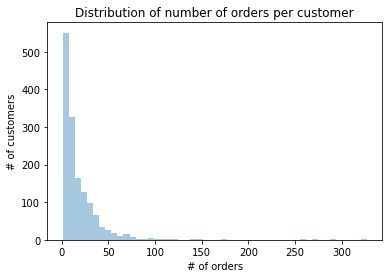

In [156]:
ax = sns.distplot(n_orders, kde=False, hist=True)
ax.set(title='Distribution of number of orders per customer',
       xlabel='# of orders', 
       ylabel='# of customers');

In [157]:
df3 = df3[['CustomerID', 'Transaction_ID', 'New_Transaction_Date']].drop_duplicates()

In [163]:
df3['order_month'] = pd.to_datetime(df['New_Transaction_Date']).dt.to_period('M')
df3['cohort'] = df.groupby('CustomerID')['New_Transaction_Date'] \
                 .transform('min')

In [164]:
df3.cohort=pd.to_datetime(df3.cohort).dt.to_period('M')

In [165]:
df3

,CustomerID,Transaction_ID,New_Transaction_Date,order_month,cohort
0,17850,16679,2019-01-01,2019-01,2019-01
12,17850,16680,2019-01-01,2019-01,2019-01
24,17850,16696,2019-01-01,2019-01,2019-01
36,17850,16699,2019-01-01,2019-01,2019-01
48,17850,16700,2019-01-01,2019-01,2019-01
...,...,...,...,...,...
630204,14608,27753,2019-05-11,2019-05,2019-05
630216,15797,40896,2019-10-17,2019-10,2019-10
630228,12990,46842,2019-12-14,2019-12,2019-12
630240,12990,46843,2019-12-14,2019-12,2019-12


In [169]:
df3_cohort = df3.groupby(['cohort', 'order_month']) \
              .agg(n_customers=('CustomerID', 'nunique')) \
              .reset_index(drop=False)
df3_cohort['period_number'] = (df3_cohort.order_month - df3_cohort.cohort).apply(attrgetter('n'))

In [170]:
cohort_pivot = df3_cohort.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'n_customers')
cohort_pivot

period_number,0,1,2,3,4,5,6,7,8,9,10,11
cohort,,,,,,,,,,,,
2019-01,215.0,13.0,24.0,34.0,23.0,44.0,35.0,47.0,23.0,28.0,20.0,34.0
2019-02,96.0,7.0,9.0,16.0,17.0,22.0,19.0,15.0,12.0,11.0,16.0,NaN
2019-03,177.0,18.0,35.0,25.0,32.0,33.0,22.0,22.0,15.0,19.0,NaN,NaN
2019-04,163.0,14.0,24.0,24.0,18.0,15.0,10.0,16.0,12.0,NaN,NaN,NaN
2019-05,112.0,12.0,9.0,13.0,10.0,13.0,14.0,8.0,NaN,NaN,NaN,NaN
2019-06,137.0,20.0,22.0,12.0,11.0,14.0,11.0,NaN,NaN,NaN,NaN,NaN
2019-07,93.0,12.0,4.0,5.0,10.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-08,136.0,14.0,16.0,11.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09,78.0,6.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [175]:
cohort_size = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)

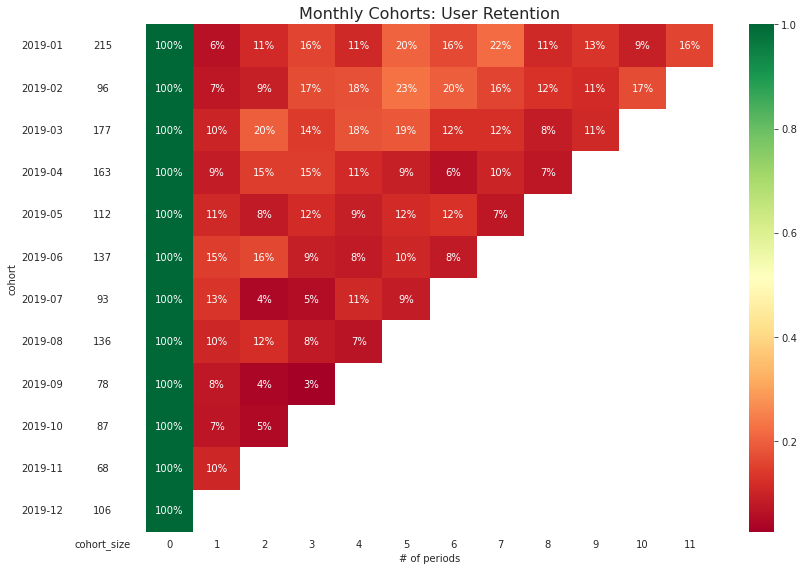

In [178]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df3 = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df3, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()